In [27]:
#This Python 3 environment comes with many helpful analytics libraries installed
#It is defined by the Kaggle/Python Docker image: https://github.com/kaggle/docker-python
#For example, here is several packages loaded

import pandas as pd #read excel or csv file, data processing    
import numpy as np #recommendation system
import matplotlib.pyplot as plt  #data visualisation
import seaborn as sns #data visualisation
import requests

In [28]:
pd.read_excel('C:\\Users\\kim.conway\\Spotify 2010 - 2019 Top 100 Songs.xlsx')
#import excel file

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,2020‑06‑22,155,73,83,-4,12,45,313,1,22,86,2019,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,2020‑06‑22,80,50,55,-9,80,41,190,23,7,85,2019,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019,2020‑06‑22,103,77,89,-5,9,46,177,1,7,68,2019,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,2020‑08‑20,138,58,53,-6,10,59,214,1,10,67,2019,Duo


# DATA

In [29]:
df = pd.read_excel('C:\\Users\\kim.conway\\Spotify 2010 - 2019 Top 100 Songs.xlsx')
#Assign name to dataframe

In [30]:
df.info()
# 1000 entries, 17 Columns
# data type for columnns no. 3, 5-15 are integer' incuding ' year released'
# data type for all other columns is 'object'
# Data appears to have no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          1000 non-null   object
 1   artist         1000 non-null   object
 2   top genre      1000 non-null   object
 3   year released  1000 non-null   int64 
 4   added          1000 non-null   object
 5   bpm            1000 non-null   int64 
 6   nrgy           1000 non-null   int64 
 7   dnce           1000 non-null   int64 
 8   dB             1000 non-null   int64 
 9   live           1000 non-null   int64 
 10  val            1000 non-null   int64 
 11  dur            1000 non-null   int64 
 12  acous          1000 non-null   int64 
 13  spch           1000 non-null   int64 
 14  pop            1000 non-null   int64 
 15  top year       1000 non-null   int64 
 16  artist type    1000 non-null   object
dtypes: int64(12), object(5)
memory usage: 132.9+ KB


In [31]:
df.shape
# 1000 entries, 17 Columns

(1000, 17)

In [32]:
df.head()
# shows the first 5 rows of the dataset
# column 'artist type' returns more than one value

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo


In [33]:
df.tail()
# shows the last 5 rows of data
# column type seems consistent in each row

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
995,SICKO MODE,Travis Scott,hip hop,2018,2020‑06‑22,155,73,83,-4,12,45,313,1,22,86,2019,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,2020‑06‑22,80,50,55,-9,80,41,190,23,7,85,2019,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019,2020‑06‑22,103,77,89,-5,9,46,177,1,7,68,2019,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,2020‑08‑20,138,58,53,-6,10,59,214,1,10,67,2019,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019,2020‑06‑22,98,59,80,-7,13,18,200,2,15,75,2019,Solo


In [34]:
df.columns
#below is description of column names
#title: title of song
#artist: name of artist whom released song
#top genre: genre in which song and title are classifed
#year released: Year the song was released
#added:  Date song was added to Spotify's Top Hits Playlist 
#bpm: Beats per Minute- Tempo of the Song
#nrgy: Engergy, How energetic the song is
#dnce: Danceability - How easy it is to dance to the song
#db: Decibel - How loud the song is
#live: How likely the song is a live recording
#val: How positive the mood of the song is
#dur: Duration of the Song
#acous: How acoustic the song is
#spch: The more the song is focused on the spoken word
#pop: Popularity of the song (not a ranking)
#top year: Year the song was a top hit
#artist type: Tells if the the artist is solo, duo, tri

Index(['title', 'artist', 'top genre', 'year released', 'added', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year',
       'artist type'],
      dtype='object')

In [35]:
df.describe()
#oldest song: 1975 year of realease
#youngest song: 2021 year of release
#mean song: 2014 year of release

,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2014.390000,121.262000,69.502000,66.876000,-5.663000,17.911000,50.901000,220.406000,14.36900,10.064000,74.840000,2014.500000
std,3.241359,26.238022,15.961415,13.121921,2.025224,13.431511,21.563399,39.927677,19.45403,9.276743,8.807836,2.873719
min,1975.000000,65.000000,6.000000,19.000000,-18.000000,2.000000,4.000000,113.000000,0.00000,2.000000,35.000000,2010.000000
25%,2012.000000,100.000000,59.000000,59.000000,-7.000000,9.000000,35.000000,197.000000,2.00000,4.000000,70.000000,2012.000000
50%,2014.000000,122.000000,71.000000,68.000000,-5.000000,12.000000,50.500000,216.000000,6.00000,6.000000,76.000000,2014.500000
75%,2017.000000,134.000000,81.250000,75.000000,-4.000000,23.000000,68.000000,237.000000,19.00000,12.000000,81.000000,2017.000000
max,2021.000000,206.000000,98.000000,96.000000,-1.000000,83.000000,97.000000,688.000000,98.00000,53.000000,95.000000,2019.000000


In [36]:
df = df.rename(columns={"bpm":"Beats per Minute"})
df = df.rename(columns={"nrgy":"Energetic"})
df = df.rename(columns={"dnce":"danceability"})
df = df.rename(columns={"dB":"How Loud"})
df = df.rename(columns={"live":"Likely to be Live"})
df = df.rename(columns={"val":"Mood Positivity"})
df = df.rename(columns={"dur":"duration of song"})
df = df.rename(columns={"acous":"Is song acoustic"})
df = df.rename(columns={"spch":"Focus on Spoken word"})
df = df.rename(columns={"pop":"Popularity (not ranking)"})
df = df.rename(columns={"added":"Date Added to Top hits list"})
df.head()
# rename columns to allow better understanding of the dataset

,title,artist,top genre,year released,Date Added to Top hits list,Beats per Minute,Energetic,danceability,How Loud,Likely to be Live,Mood Positivity,duration of song,Is song acoustic,Focus on Spoken word,Popularity (not ranking),top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo


# Preparation

In [38]:
Spotify_df = df.copy()
#make a copy of the dataset

In [39]:
Spotify_df.info()
#check inforamtion in resulting dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   title                        1000 non-null   object
 1   artist                       1000 non-null   object
 2   top genre                    1000 non-null   object
 3   year released                1000 non-null   int64 
 4   Date Added to Top hits list  1000 non-null   object
 5   Beats per Minute             1000 non-null   int64 
 6   Energetic                    1000 non-null   int64 
 7   danceability                 1000 non-null   int64 
 8   How Loud                     1000 non-null   int64 
 9   Likely to be Live            1000 non-null   int64 
 10  Mood Positivity              1000 non-null   int64 
 11  duration of song             1000 non-null   int64 
 12  Is song acoustic             1000 non-null   int64 
 13  Focus on Spoken word         1000 

In [40]:
Spotify_df.duplicated()
#checks for duplicates - only returns head and tail of dataset

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [41]:
Spotify_df.duplicated().sum()
#Confirms there are no duplicates whithin the entire dataset

0

# Analysis

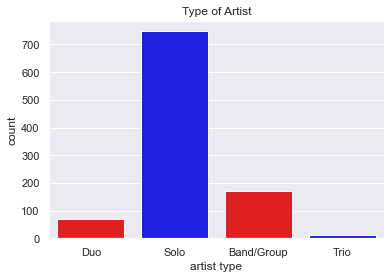

In [19]:
#Are artists with top 100 songs solo, duo, trio?
#Graph No.1
sns.set(style="darkgrid")
plt.title("Type of Artist")
ax = sns.countplot(x="artist type", data=Spotify_df, palette=("Red", "Blue"))

#evident the number of solo artists wihtin the top hits list outweight duo's, bands, or groups and trios significantly 

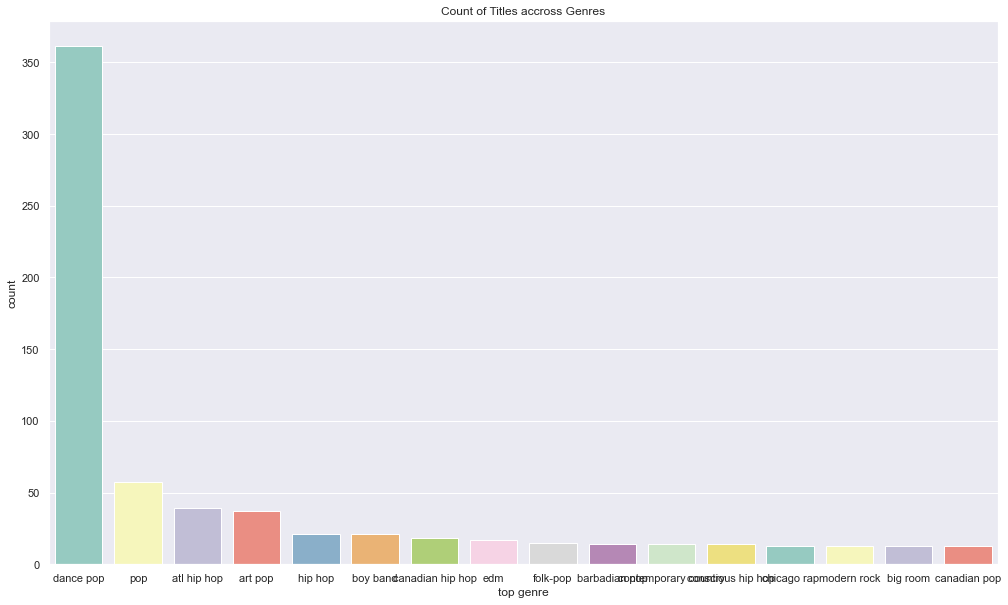

In [20]:
#count the titles accross genres
# Graph No. 2
plt.figure(figsize=(17,10))
sns.set(style="darkgrid")
ax = sns.countplot(x='top genre', data=Spotify_df, palette=("Set3"), order=Spotify_df['top genre'].value_counts().index[0:16])
plt.title('Count of Titles accross Genres')
plt.show()
# clearly shows top four genres within the top 100 songs between 2010 and 2019 is Dance Pop, pop, hip hop, and art pop
# remaining genres evenly matched accross the stats

In [21]:
#What are the different genres?
count_by_genre = Spotify_df['top genre'].value_counts()
count_by_genre


dance pop           361
pop                  57
atl hip hop          39
art pop              37
hip hop              21
                   ... 
french indie pop      1
dutch hip hop         1
new french touch      1
afrofuturism          1
bass trap             1
Name: top genre, Length: 132, dtype: int64

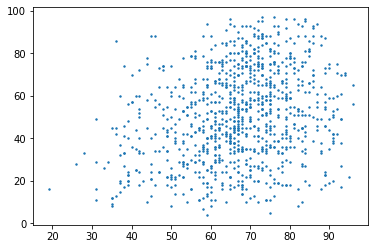

In [55]:
#Graph 3
plt.scatter(Spotify_df['danceability'], Spotify_df['Mood Positivity'], s=2)
plt.show()

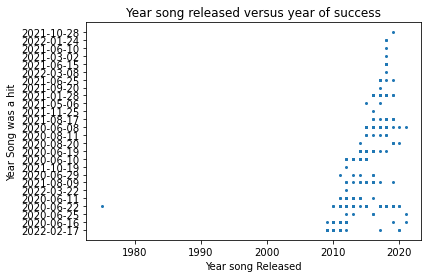

In [47]:
#Graph 4
#year released versus top year
Spotify_df.plot(kind='scatter', x='year released', y='Date Added to Top hits list', s=4)
plt.title('Year song released versus year of success')
plt.xlabel('Year song Released')
plt.ylabel('Year Song was a hit')
plt.show()

<AxesSubplot:xlabel='top year', ylabel='artist type'>

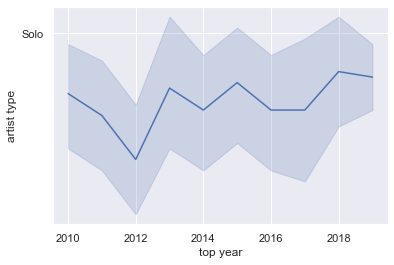

In [23]:
sns.lineplot(data=Spotify_df, x='top year', y='artist type')

In [25]:
Spotify_df['duration of song'].value_counts()
#check for the different durations

201    21
214    21
228    18
199    17
200    17
       ..
265     1
266     1
281     1
283     1
688     1
Name: duration of song, Length: 176, dtype: int64

In [26]:
Artist_df = Spotify_df[(Spotify_df['artist type'] == 'Solo')]
Artist_df.head()
#create seperate dataset for solo artists
# we can check duration of songs for these artist types 

,title,artist,top genre,year released,Date Added to Top hits list,Beats per Minute,Energetic,danceability,How Loud,Likely to be Live,Mood Positivity,duration of song,Is song acoustic,Focus on Spoken word,Popularity (not ranking),top year,artist type
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo
5,Magic (feat. Rivers Cuomo),B.o.B,atl hip hop,2010,2022‑02‑17,82,93,55,-4,35,79,196,1,34,71,2010,Solo
8,Talking to the Moon,Bruno Mars,dance pop,2010,2022‑02‑17,146,59,50,-5,11,8,218,51,3,87,2010,Solo


In [27]:
Artist_df['duration of song'].value_counts()

201    18
221    15
206    14
234    14
215    14
       ..
262     1
265     1
266     1
271     1
688     1
Name: duration of song, Length: 159, dtype: int64

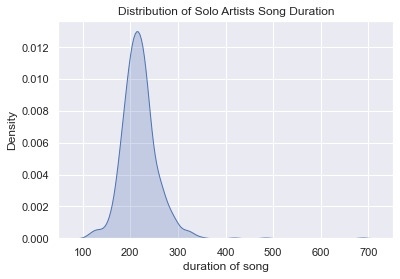

In [28]:
#Graph 5
#duration of songs by solo artist
sns.set(style="darkgrid")
sns.kdeplot(data=Artist_df['duration of song'], shade=True)
plt.title('Distribution of Solo Artists Song Duration')
plt.show()

#now we can create a graph to illustate the distribution of duration of songs for solo artists
# the largest number of songs are between 175 (2 mins 55 sec) to 220 seconds (3mins 40 seconds).
# these timeframes makes sense as song needs to be at length that will hold audience for whole song

Text(0.5, 0, 'Song Duration Over the Years')

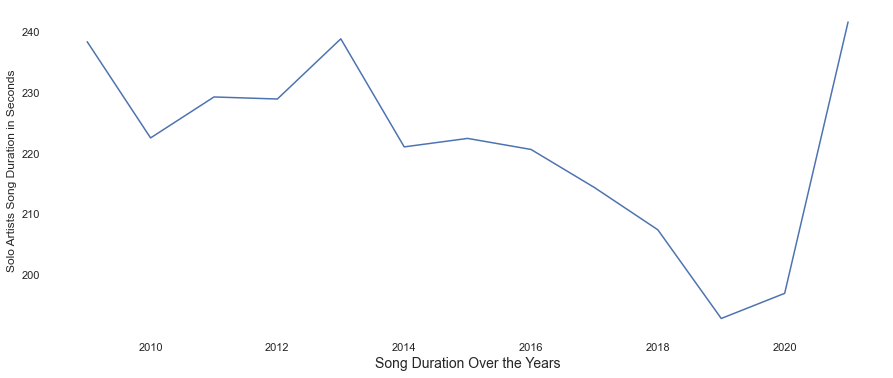

In [38]:
#Graph 6
#trend of song duration by year for solo artists
duration_by_year = Artist_df.groupby(['year released']).mean()
duration_by_year = duration_by_year.sort_index()

plt.figure(figsize=(15,6))
sns.lineplot(x=duration_by_year.index, y=duration_by_year['duration of song'].values)
plt.box(on=None)
plt.ylabel('Solo Artists Song Duration in Seconds')
plt.xlabel('Song Duration Over the Years', fontsize=14)

Text(0.5, 1.0, 'Number of Solo Artists Songs Released by Year')

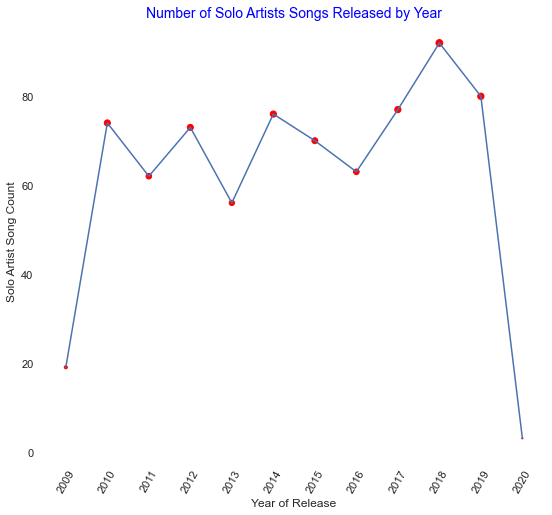

In [39]:
#Graph 7
#no of songs that reach top 100 list released in each year
release_year = Artist_df['year released'].value_counts()
release_year = release_year.sort_index(ascending=True)

plt.figure(figsize=(9,8))
plt.plot(release_year[-16:-1])
plt.scatter(release_year[-16:-1].index, release_year[-16:-1].values, s=0.5*release_year[-16:-1].values, c='red')
plt.box(on=None)
plt.ylabel('Solo Artist Song Count')
plt.xlabel('Year of Release')
plt.xticks(rotation = 60)
plt.xticks(release_year[-16:-1].index)
plt.title('Number of Solo Artists Songs Released by Year', color='blue', fontsize=14)

# trend flucates between 2009 to 2016
# sharp increase in songs released from Solo Artists that hit the top 100 lists between 2016 and 2018 
# peak release year was 2018 before sharp fall in 2019 and 2020, however data gathered only includes songs up and including 2019 
# which would explain this decline


# Merging

In [51]:
#merging - reading and inspecting data from second spotify dataset
Streams = pd.read_csv('C:\\Users\\kim.conway\\Spotify_final_dataset.csv')
Streams.head()

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,(x29),2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,(x20),2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,(x4),1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,(x124),2905678,718865961


In [52]:
Streams.info()
#share two columns similar 'Artist name' v 'Artist' and 'Song Name' v 'title' 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Position                11084 non-null  int64  
 1   Artist Name             11084 non-null  object 
 2   Song Name               11080 non-null  object 
 3   Days                    11084 non-null  int64  
 4   Top 10 (xTimes)         11084 non-null  float64
 5   Peak Position           11084 non-null  int64  
 6   Peak Position (xTimes)  11084 non-null  object 
 7   Peak Streams            11084 non-null  int64  
 8   Total Streams           11084 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 779.5+ KB


In [58]:
Streams = Streams.rename(columns={"Artist Name":"Artist"})
Streams = Streams.rename(columns={"Song Name":"title"})
#change column names to so shared information can sit in one column

In [60]:
Streams = Streams.rename(columns={"Artist":"artist"})

In [61]:
Streams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Position                11084 non-null  int64  
 1   artist                  11084 non-null  object 
 2   title                   11080 non-null  object 
 3   Days                    11084 non-null  int64  
 4   Top 10 (xTimes)         11084 non-null  float64
 5   Peak Position           11084 non-null  int64  
 6   Peak Position (xTimes)  11084 non-null  object 
 7   Peak Streams            11084 non-null  int64  
 8   Total Streams           11084 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 779.5+ KB


In [62]:
Streams.isnull().sum()
# check for null values, 4 found in 'title'

Position                  0
artist                    0
title                     4
Days                      0
Top 10 (xTimes)           0
Peak Position             0
Peak Position (xTimes)    0
Peak Streams              0
Total Streams             0
dtype: int64

In [63]:
# % of missing rows in each column
for column in Streams.columns:
    percentage = Streams[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')
    # only small percentage confirmed in Song name and as will not affect overall data will drop these

Position: 0.0%
artist: 0.0%
title: 0.04%
Days: 0.0%
Top 10 (xTimes): 0.0%
Peak Position: 0.0%
Peak Position (xTimes): 0.0%
Peak Streams: 0.0%
Total Streams: 0.0%


In [64]:
Streams.dropna(axis=0, how='any', inplace=True)
#drop all rows with missing values and overwrite the dataset

In [65]:
Streams.isnull().sum()
#confirm missing rows have been removed

Position                  0
artist                    0
title                     0
Days                      0
Top 10 (xTimes)           0
Peak Position             0
Peak Position (xTimes)    0
Peak Streams              0
Total Streams             0
dtype: int64

In [70]:
Spotify_Streams_df = pd.merge(Spotify_df, Streams, how='inner', on = 'title')
Spotify_Streams_df.head()

#using pandas to merge both datasets on 'title' that appears in both

,title,artist_x,top genre,year released,Date Added to Top hits list,Beats per Minute,Energetic,danceability,How Loud,Likely to be Live,...,top year,artist type,Position,artist_y,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,Talking to the Moon,Bruno Mars,dance pop,2010,2022‑02‑17,146,59,50,-5,11,...,2010,Solo,873,Bruno Mars,242,0.0,56,0,341216,59926571
1,Just the Way You Are,Bruno Mars,dance pop,2010,2022‑02‑17,109,84,64,-5,6,...,2010,Solo,6547,Bruno Mars,12,0.0,90,0,207621,1016697
2,Over,Drake,canadian hip hop,2010,2022‑02‑17,100,85,35,-6,12,...,2010,Solo,5066,Lucky Daye,9,0.0,117,0,263179,2202583
3,Over,Drake,canadian hip hop,2010,2022‑02‑17,100,85,35,-6,12,...,2010,Solo,5367,Playboi Carti,5,0.0,49,0,660057,1870249
4,Over,Drake,canadian hip hop,2010,2022‑02‑17,100,85,35,-6,12,...,2010,Solo,10617,Kings of Leon,1,0.0,153,0,148486,148486


In [73]:
Spotify_Streams_df.isnull().sum()
# check and count missing values returns zero

title                          0
artist_x                       0
top genre                      0
year released                  0
Date Added to Top hits list    0
Beats per Minute               0
Energetic                      0
danceability                   0
How Loud                       0
Likely to be Live              0
Mood Positivity                0
duration of song               0
Is song acoustic               0
Focus on Spoken word           0
Popularity (not ranking)       0
top year                       0
artist type                    0
Position                       0
artist_y                       0
Days                           0
Top 10 (xTimes)                0
Peak Position                  0
Peak Position (xTimes)         0
Peak Streams                   0
Total Streams                  0
dtype: int64

In [74]:
Spotify_Streams_df.shape
# 764 rows, 25 columns

(764, 25)

In [75]:
#sort in descending order, so as output should reflect most song to be streamed
Spotify_Streams_df.sort_values(by=['Peak Streams'], inplace=True, ascending =False)
Spotify_Streams_df.head(20)
# some interesting notes, all solo artist, Artist repeating i.e drake (5 entries or 25%)

,title,artist_x,top genre,year released,Date Added to Top hits list,Beats per Minute,Energetic,danceability,How Loud,Likely to be Live,...,top year,artist type,Position,artist_y,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
604,Nonstop,Drake,canadian hip hop,2018,2020‑06‑22,155,41,91,-8,10,...,2018,Solo,88,Drake,478,69.0,1,(x7),5749019,286786239
606,In My Feelings,Drake,canadian hip hop,2018,2020‑06‑22,91,63,84,-6,40,...,2018,Solo,85,Drake,348,83.0,1,(x37),4805299,288633458
603,God's Plan,Drake,canadian hip hop,2018,2020‑06‑22,77,45,75,-9,55,...,2018,Solo,18,Drake,634,139.0,1,(x70),4739798,534994242
674,SAD!,XXXTENTACION,emo rap,2018,2020‑06‑22,75,61,74,-5,12,...,2018,Solo,9,XXXTENTACION,1217,133.0,1,(x6),4437612,619879245
689,"thank u, next",Ariana Grande,dance pop,2019,2020‑06‑22,107,65,72,-6,10,...,2019,Solo,62,Ariana Grande,463,93.0,1,(x42),4190968,317987550
672,SICKO MODE,Travis Scott,hip hop,2018,2020‑06‑22,155,73,83,-4,12,...,2019,Solo,13,Travis Scott,1046,190.0,1,(x19),4129691,586638599
671,SICKO MODE,Travis Scott,hip hop,2018,2020‑06‑22,155,73,83,-4,12,...,2018,Solo,13,Travis Scott,1046,190.0,1,(x19),4129691,586638599
536,HUMBLE.,Kendrick Lamar,conscious hip hop,2017,2021‑01‑28,150,62,91,-7,10,...,2017,Solo,11,Kendrick Lamar,1175,152.0,1,(x67),4060034,606305588
687,7 rings,Ariana Grande,dance pop,2019,2020‑06‑22,140,32,78,-11,9,...,2019,Solo,54,Ariana Grande,559,72.0,1,(x34),3961641,332694161
609,I'm Upset,Drake,canadian hip hop,2018,2020‑06‑22,150,59,90,-8,8,...,2018,Solo,459,Drake,170,26.0,4,0,3945109,112748287


In [13]:
import bs4
from bs4 import BeautifulSoup

In [22]:
url = 'https://www.cso.ie/en/releasesandpublications/ep/p-cpi/consumerpriceindexfebruary2023'

In [18]:
headers = {
    "user-Agnt" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"
}

In [23]:
r = requests.get(url,{'headers':headers})

SSLError: HTTPSConnectionPool(host='www.cso.ie', port=443): Max retries exceeded with url: /en/releasesandpublications/ep/p-cpi/consumerpriceindexfebruary2023?headers=user-Agnt (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1125)')))